# Gaia dataset and queries with ADQL (Astronomical Data Query Language)

## Overview
ADQL is a specialized variant of the SQL query language adapted for accessing the astronomical datasets of the virtual observatory, via the Table access protocol (TAP). ADQL is dedigned to handle large datasets distributed over several locations, while not retrieving data that is not needed.

## Language
ADQL is a query language that allows data to be retrieved via a single command, the select statement, which is designed to perform as the select statement in the SQL language. ADQL has extensions designed to improve handling of astronomical data such as spherical co-ordinates that are not handled by standard SQL.

## Example

```sql
SELECT source_id, ra, dec
FROM gaiadr1.tgas_source
WHERE phot_g_mean_flux > 13
```

##  Basic Queries with Gaia Database wit GUI
The Gaia archive can be found here: https://gea.esac.esa.int/archive/. Click on search tab. Search tab has tree options: Basic, Advanced(ADQL) and Query Results.
<img src="gaia-archive-search-01.png"> 

## Basic Query with ADQL on jupyter notebook
NiceToHave - Astropy and Astroquery with jupyter notebook: https://cevheri.medium.com/astronomical-data-analysis-with-python-using-astropy-and-astroquery-ff7857588c5f

### Install the necessary libraries

In [1]:
!pip install astroquery

### Import the necessary libraries

In [2]:
from astroquery.gaia import Gaia
import pandas as pd

#### ADQL Query for 10.000 closest stars

In [3]:
print("Querying Gaia database...")
query = """
SELECT TOP 10000
       source_id,
       parallax,
       parallax_error,
       phot_g_mean_mag,
       bp_rp,
       ra,
       ra_error
 FROM gaiadr3.gaia_source
WHERE parallax > 0
ORDER BY parallax DESC
"""
print("ADQL Query: ", query)
path = 'closest_10000.csv'
job = Gaia.launch_job(query, output_file=path, output_format='csv', dump_to_file=True)
print(f"Job finished. Data saved to {path}. Job Info: {job}")

Querying Gaia database...
ADQL Query:  
SELECT TOP 10000
       source_id,
       parallax,
       parallax_error,
       phot_g_mean_mag,
       bp_rp,
       ra,
       ra_error
 FROM gaiadr3.gaia_source
WHERE parallax > 0
ORDER BY parallax DESC

Job finished. Data saved to closest_10000.csv. Job Info: Jobid: None
Phase: COMPLETED
Owner: None
Output file: closest_10000.csv
Results: None


#### Explanation of the query
* **source_id**: Unique identifier for each star.
* **parallax**: The apparent shift of the star due to Earth's orbit around the Sun, used to measure distance.
* **parallax_error**: The error in the parallax measurement.
* **phot_g_mean_mag**: The mean magnitude in the G band.
* **bp_rp**: The color index, representing the difference between the blue and red photometric bands.
* **ra**: Right Ascension, the celestial equivalent of longitude.
* **ra_error**: The error in the right ascension measurement.

#### EDA - Exploratory Data Analysis

##### Load data

In [4]:
df = pd.read_csv(path)
df.head()

,source_id,parallax,parallax_error,phot_g_mean_mag,bp_rp,ra,ra_error
0,5853498713190525696,768.066539,0.049873,8.984749,3.804580,217.392321,0.023999
1,4472832130942575872,546.975940,0.040116,8.193974,2.833697,269.448503,0.026239
2,3864972938605115520,415.179416,0.068371,11.038391,4.184836,164.103190,0.066837
3,762815470562110464,392.752945,0.032067,6.551172,2.215609,165.830960,0.024126
4,2947050466531873024,374.489589,0.231335,8.524133,-0.278427,101.286626,0.164834


##### Data Description

In [5]:
df.shape

(10000, 7)

##### Data info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   source_id        10000 non-null  int64  
 1   parallax         10000 non-null  float64
 2   parallax_error   10000 non-null  float64
 3   phot_g_mean_mag  9985 non-null   float64
 4   bp_rp            9632 non-null   float64
 5   ra               10000 non-null  float64
 6   ra_error         10000 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 547.0 KB


#### Data Visualization

##### Import the necessary libraries

In [7]:
import matplotlib.pyplot as plt

##### Visualize the data

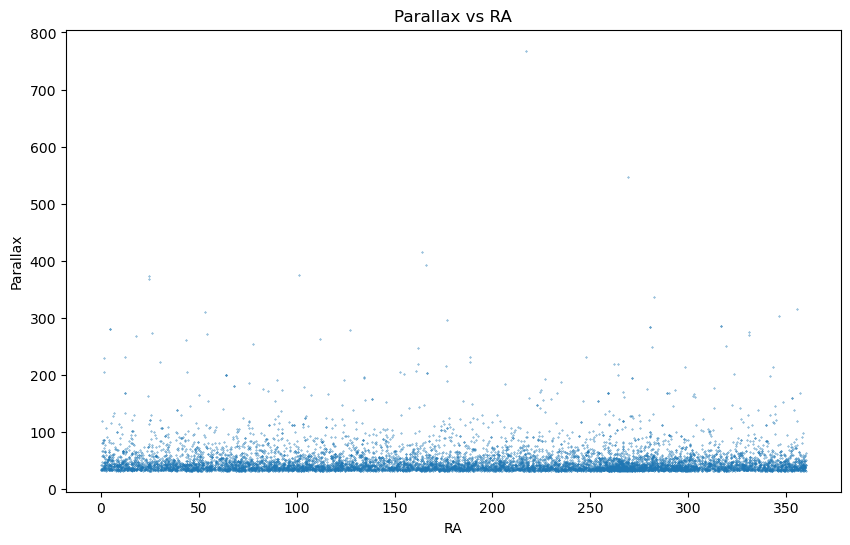

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(df['ra'], df['parallax'], s=0.1)
plt.xlabel('RA')
plt.ylabel('Parallax')
plt.title('Parallax vs RA')
plt.show()


#### Explanation this plot
This plot represents the relationship between the right ascension (RA) and parallax of stars from the Gaia DR3 dataset.


#### 1000 closest stars - plot

##### Import the necessary libraries

In [9]:
import matplotlib.pyplot as plt
import numpy as np

###### calculate the distance
* Calculate distance in parsecs
* Calculate absolute g-band photometric magnitude
* Calculate absolute magnitude


In [10]:
df['distance'] = 1 / (df['parallax'] * 1e-3)
df['abs_g'] = df['phot_g_mean_mag'] + 5 + 5 * np.log10(df['distance'])
df['abs_mag'] = df['phot_g_mean_mag'] + 5 * (np.log10(df['distance']) - 1)
df.head()

,source_id,parallax,parallax_error,phot_g_mean_mag,bp_rp,ra,ra_error,distance,abs_g,abs_mag
0,5853498713190525696,768.066539,0.049873,8.984749,3.804580,217.392321,0.023999,1.301971,14.557755,4.557755
1,4472832130942575872,546.975940,0.040116,8.193974,2.833697,269.448503,0.026239,1.828234,14.504133,4.504133
2,3864972938605115520,415.179416,0.068371,11.038391,4.184836,164.103190,0.066837,2.408597,17.947212,7.947212
3,762815470562110464,392.752945,0.032067,6.551172,2.215609,165.830960,0.024126,2.546130,13.580575,3.580575
4,2947050466531873024,374.489589,0.231335,8.524133,-0.278427,101.286626,0.164834,2.670301,15.656934,5.656934


##### Plot bp_rp vs abs_mag

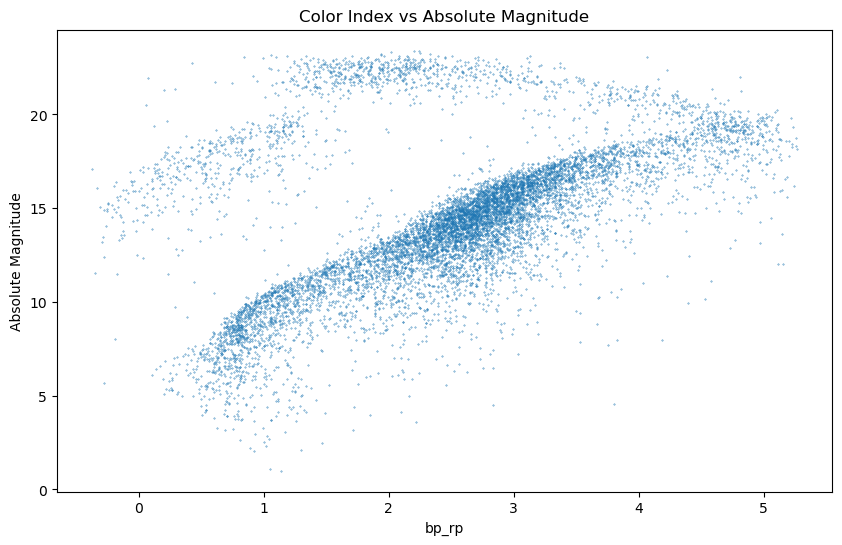

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(df['bp_rp'], df['abs_mag'], s=0.1)
plt.xlabel('bp_rp')
plt.ylabel('Absolute Magnitude')
plt.title('Color Index vs Absolute Magnitude')
plt.show()

#### Explanation of the plot
This plot represents the relationship between the color index (bp_rp) and the absolute magnitude of stars from the Gaia DR3 dataset.

##### Plot parallax vs distance

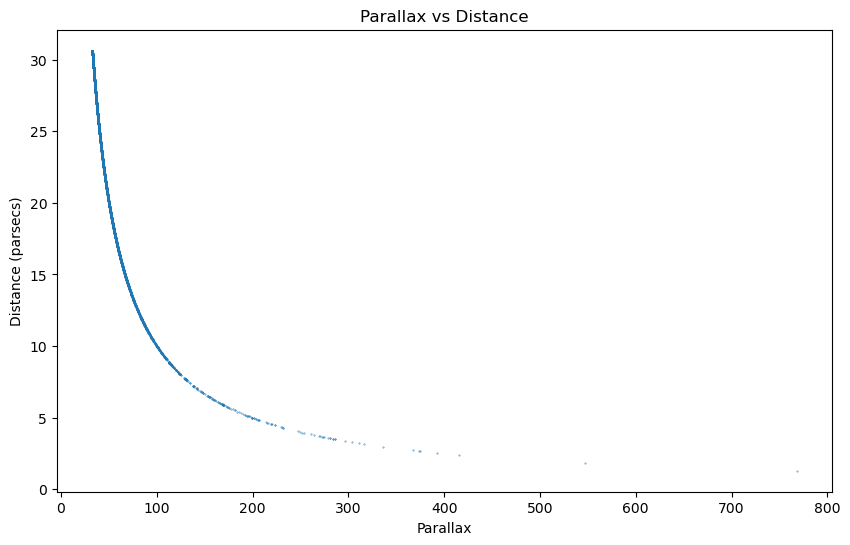

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(df['parallax'], df['distance'], s=0.1)
plt.xlabel('Parallax')
plt.ylabel('Distance (parsecs)')
plt.title('Parallax vs Distance')
plt.show()

#### Explanation of the plot
This plot represents the relationship between the parallax and distance of stars from the Gaia DR3 dataset.

##### Plot parallax vs abs_mag


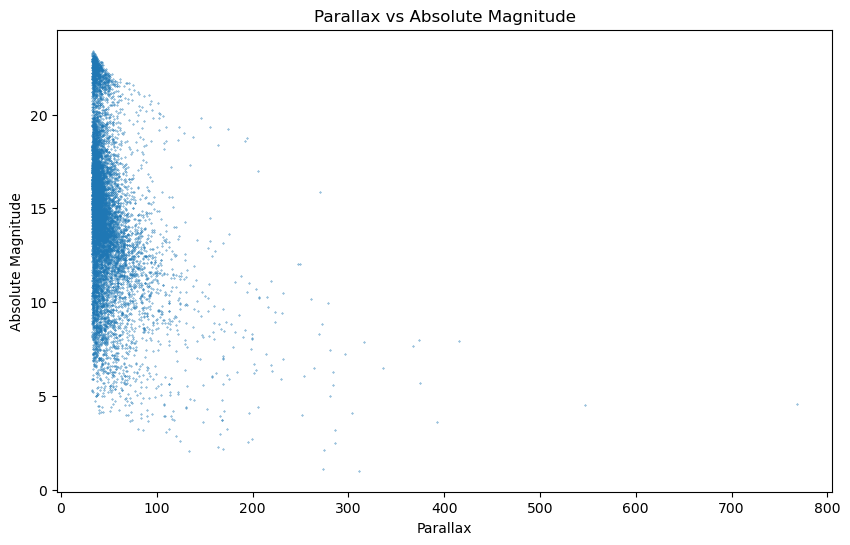

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(df['parallax'], df['abs_mag'], s=0.1)
plt.xlabel('Parallax')
plt.ylabel('Absolute Magnitude')
plt.title('Parallax vs Absolute Magnitude')
plt.show()


#### Explanation of the plot
This plot represents the relationship between the parallax and absolute magnitude of stars from the Gaia DR3 dataset.

## Conclusion
In this notebook, we have used the Gaia DR3 dataset to query the 10,000 closest stars to Earth using ADQL. We have performed exploratory data analysis (EDA) on the retrieved data, including visualizations of the relationships between various parameters such as right ascension, parallax, color index, absolute magnitude, and distance. These visualizations provide insights into the properties of stars in our cosmic neighborhood, and demonstrate the power of ADQL queries for accessing and analyzing astronomical data.

## References
1. ADQL Wiki: https://en.wikipedia.org/wiki/Astronomical_Data_Query_Language
2. Gaia Archive: https://gea.esac.esa.int/archive/
2. Gaia DR3: https://www.cosmos.esa.int/web/gaia/dr3
3. Gaia TAP + Astroquery: https://astroquery.readthedocs.io/en/latest/gaia/gaia.html
4. ADQL: https://www.ivoa.net/documents/ADQL/20180112/PR-ADQL-2.1-20180112.html
5. Intro2Astro - Gaia Introduction: https://github.com/howardisaacson/Intro-to-Astro2024/blob/main/Week4_TESS_Gaia/GaiaTutorialAssignment.ipynb

## Further Reading
* https://www.gaia.ac.uk/data/gaia-data-release-1/adql-cookbook
* https://en.wikipedia.org/wiki/Transiting_Exoplanet_Survey_Satellite
* https://www.karar.com/yazarlar/zafer-acar/tess-ile-yeni-dunyalar-kesfetmek-6853#google_vignette
* https://www.esa.int/

## Astropy and Astroquery with jupyter notebook
https://cevheri.medium.com/astronomical-data-analysis-with-python-using-astropy-and-astroquery-ff7857588c5f
